<h1 align=center><font size = 6,5>Final Project 4 Clustering</font></h1>

# Kelompok 4 - PYTN-KS19

Siti Shafa Adilah    : PYTN-KS19-01 <br>
Faisal Arif Al Faruq : PYTN-KS19-18 <br>
Dini Aryani          : PYTN-KS19-06 <br>

# A. Perkenalan

## A.1. Latar Belakang
Pentingnya pemasaran dalam pertumbuhan bisnis tak terbantahkan, dan salah satu tantangan utama dalam dunia pemasaran adalah memahami pelanggan serta mengidentifikasi kebutuhan mereka. Khususnya dalam konteks pelanggan kartu kredit, diperlukan pengelompokan untuk merumuskan strategi pemasaran yang efektif.

Dataset pelanggan kartu kredit mencakup informasi mengenai kebiasaan pembelian dan pembayaran, termasuk frekuensi pembelian tunai atau cicilan, aktivitas penarikan tunai, jumlah pembayaran, dan sebagainya. Melalui analisis individu pelanggan, kita dapat mengidentifikasi preferensi pembelian dan apakah mereka lebih suka melakukan penarikan tunai.

Dalam proyek ini, metode statistik dan machine learning dengan menggunakan teknik clustering akan diterapkan untuk mengelompokkan pelanggan. Dataset ini mencakup transaksi dari 8950 pengguna kartu kredit selama 6 bulan dengan 18 variabel, memungkinkan kita untuk mendapatkan wawasan yang lebih baik tentang perilaku pelanggan dan merumuskan strategi pemasaran yang lebih tepat sasaran.


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Analisis Faktor yang Mempengaruhi Pengelompokan Pelanggan
- Pembuatan Model yang Cocok untuk Konsep Clustering
- Pengelompokan Pelanggan Kartu Kredit Berdasarkan Faktor-Faktor yang mempengaruhi

In [1]:
#import library dan dataset
import numpy as np
import pandas as pd
df = pd.read_csv("CC GENERAL.csv")

In [2]:
#melihat 5 data teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#melihat 5 data paling bawah
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
#melihat statistik data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
#mencari missing values di tiap kolom
df.isna().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [7]:
#mengatasi missing values di CREDIT_LIMIT
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [8]:
#mengatasi missing values di MINIMUM_PAYMENTS dengan mengisi median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [9]:
#menghapus kolom CUST_ID karena berupa kode unik
df.drop(['CUST_ID'], axis=1, inplace=True)

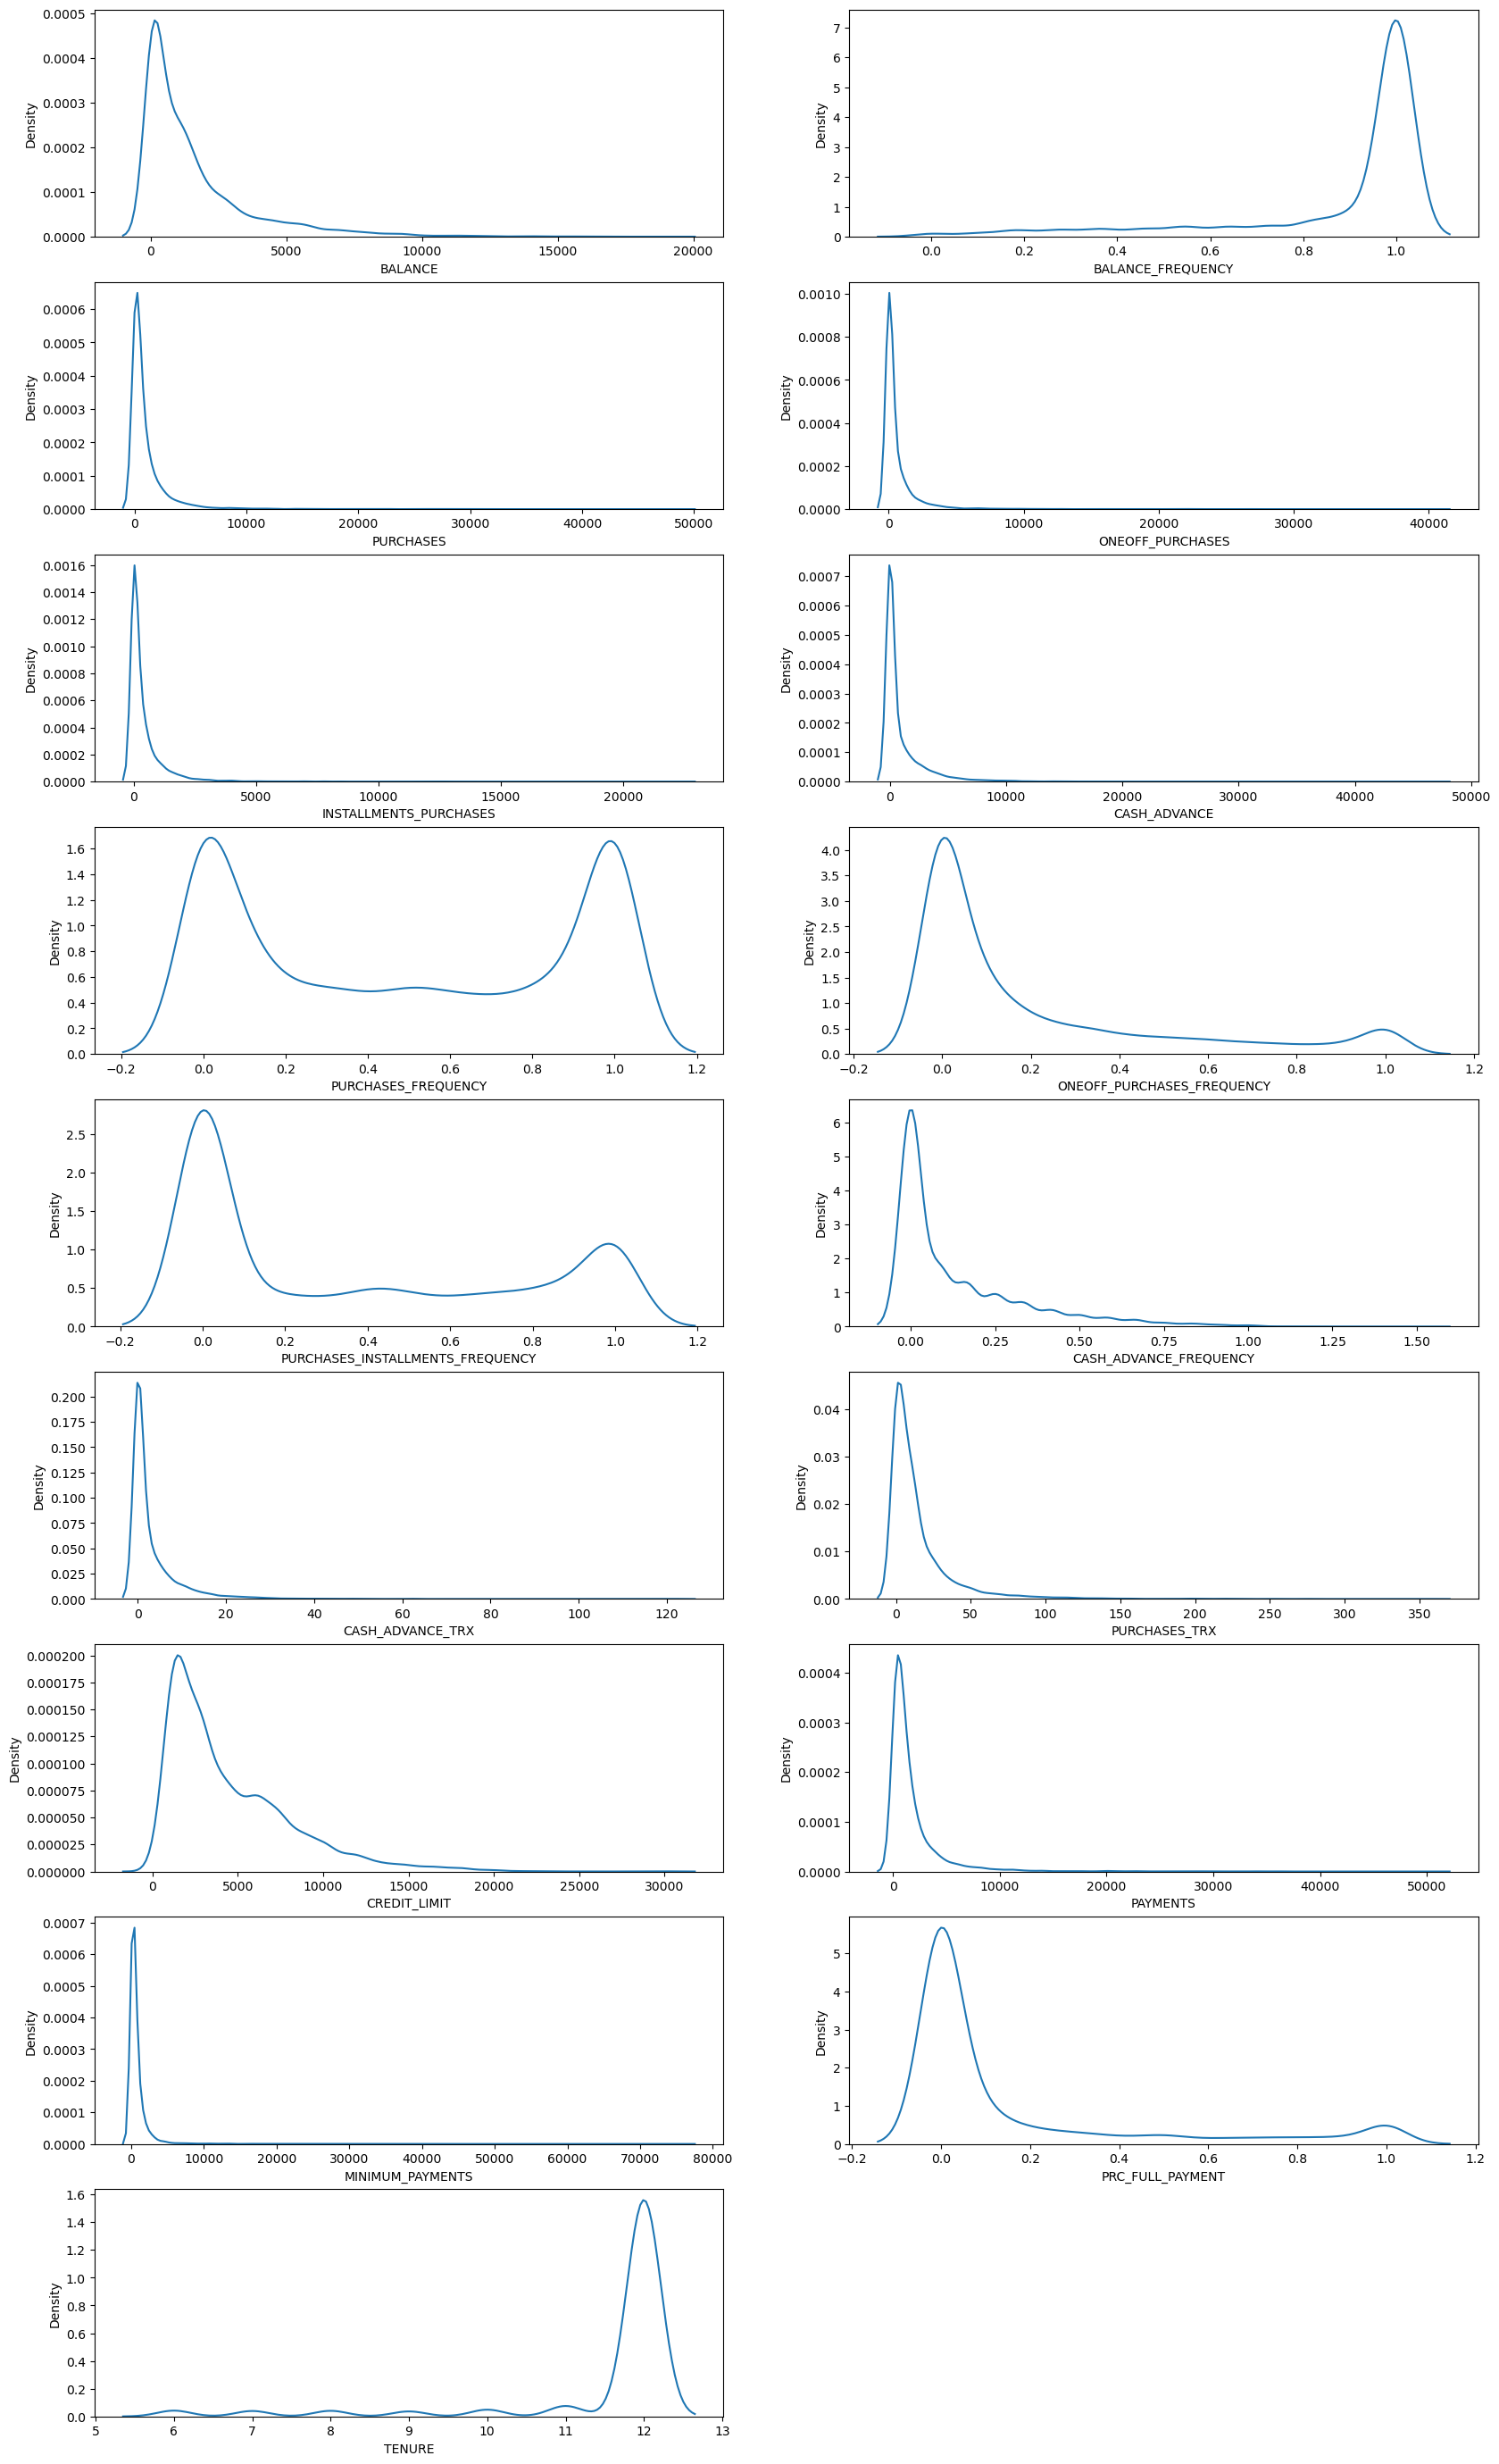

In [10]:
#memvisualisasikan tiap kolom
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

#ternyata terlihat banyak skewness karena ada beberapa costumer dengan transaksi jauh lebih banyak daripada yang lainnya

In [11]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [12]:
#mengatasi skewness dengan log transformation merupakan cara yang paling umum digunakan dengan mentransformasi data skewed ke normal
for col in cols:
    df[col] = np.log(1 + df[col])

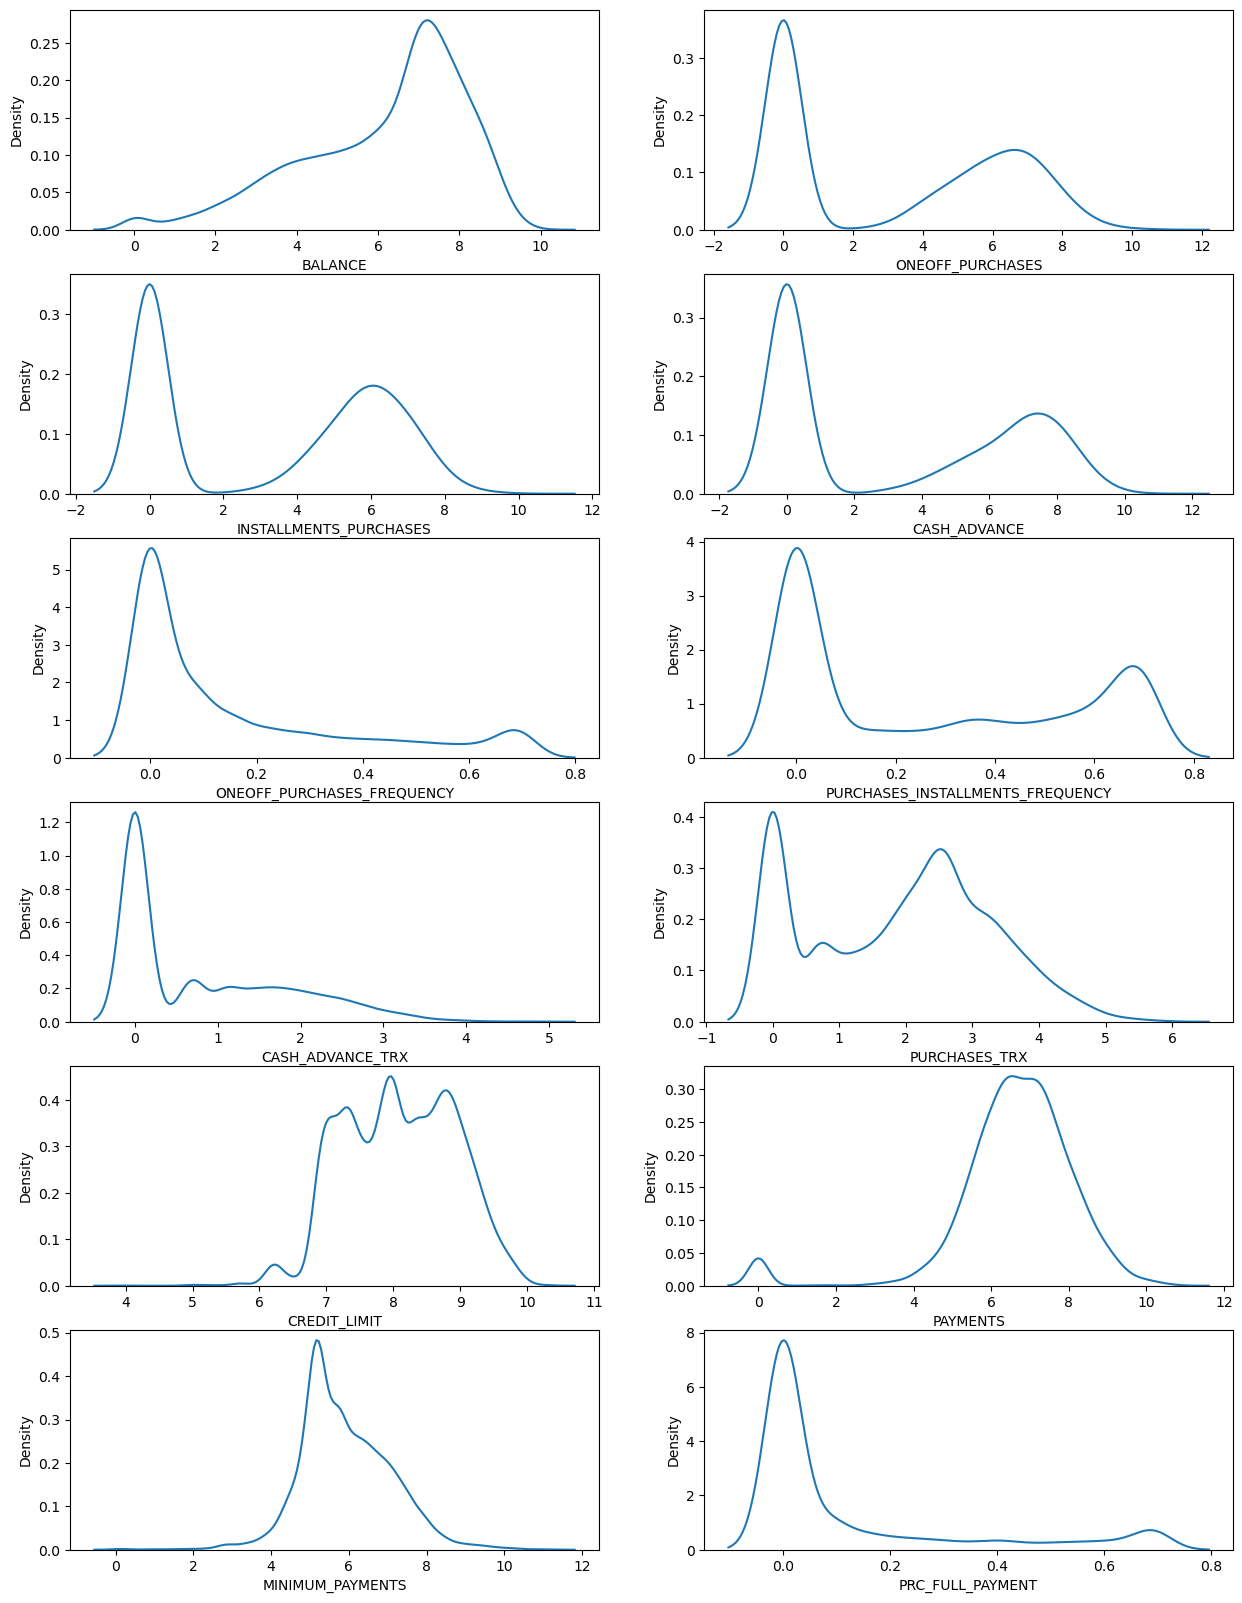

In [13]:
#hasil log transformation divisualisasi untuk melihat perubahannya
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

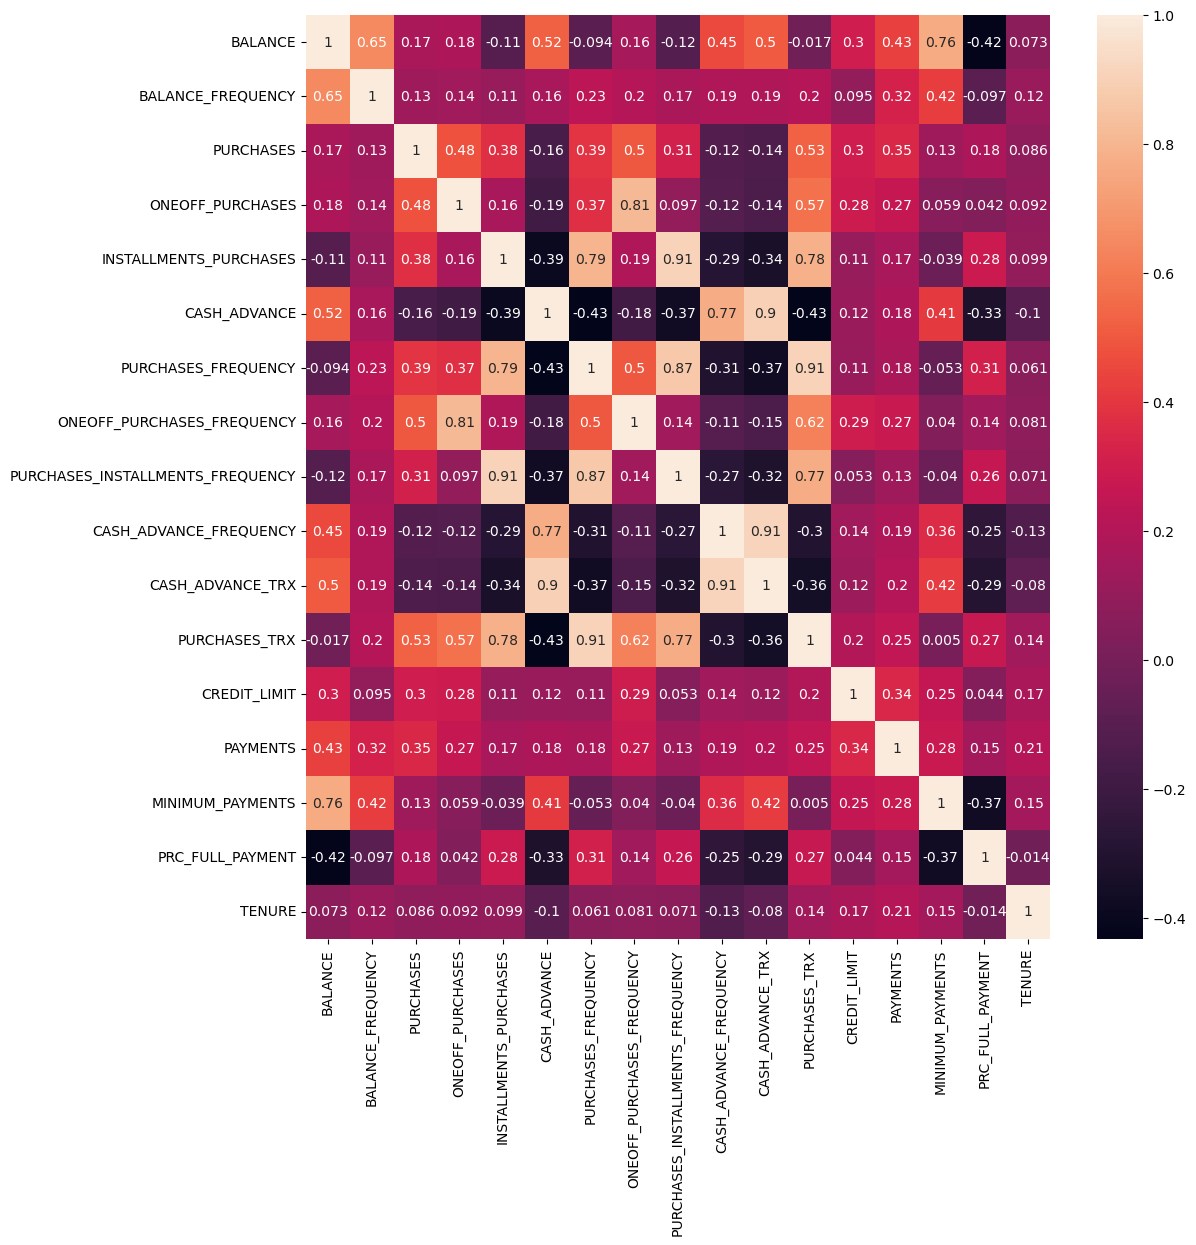

In [14]:
#mencari korelasi antar kolom dengan heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
#reduksi kolom atau feature selection dengan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

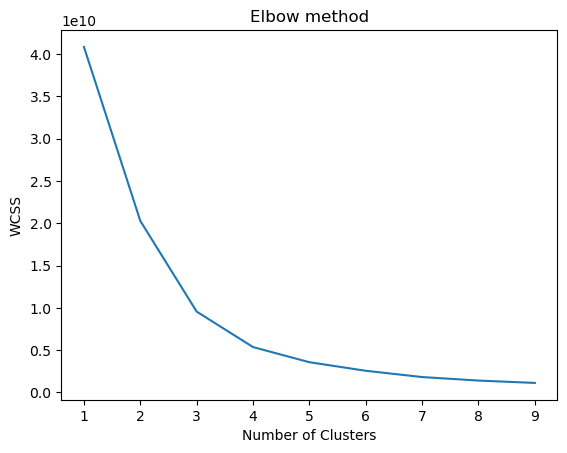

In [16]:
#modelling dengan KMeans clustering
from sklearn.cluster import KMeans

#membiarkan model memilih nilai n cluster secara random
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

#menggunakan metode elbow untuk mencari angka optimal jumlah cluster model Kmeans
#divisualisasi agar memudahkan
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

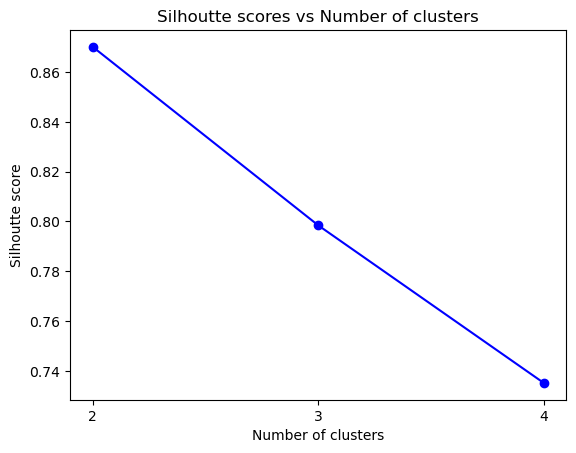

In [17]:
#di atas menunjukkan grafik rata-rata jarak dan mencari titik siku di mana laju penurunannya berubah
#jika dilihat, ketika n cluster nya 2,3,4 terjadi perubahan 
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [18]:
#silhouette score menunjukkan seberapa baik hasil clustering pada data clustering
#kita coba jika n = 2
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte score of our model is 0.8700455999561807


In [19]:
#mencari silhouette score ketika n = 3
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte score of our model is 0.7984274911767286


In [20]:
#mencari silhouette score ketika n = 4
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

#yang paling tinggi adalah ketika n = 2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte score of our model is 0.7352022651636818


In [21]:
#mengubah label yang ada menjadi index cluster di dataset
df['cluster_id'] = kmeans.labels_

#menginvers log transformation yang tadi menjadi pengukuran biasa
for col in cols:
    df[col] = np.exp(df[col])

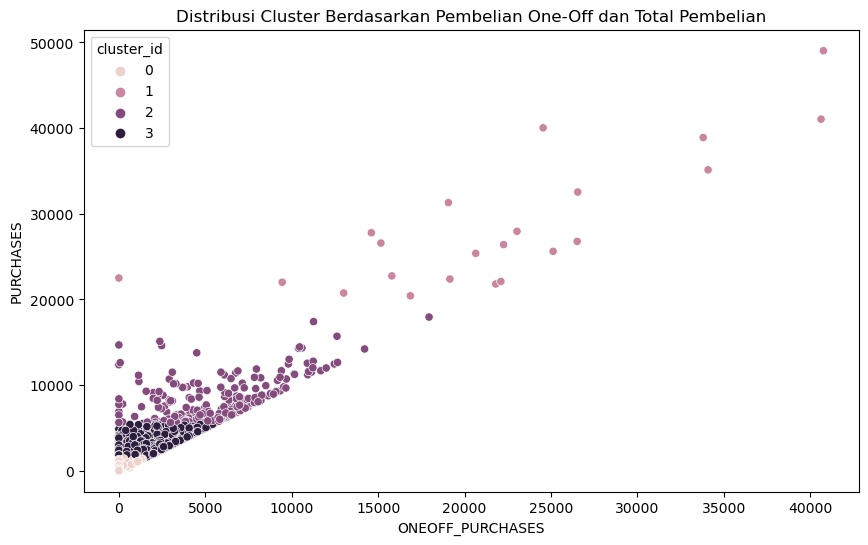

In [22]:
#melakukan visualisasi jika n = 2
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Pembelian One-Off dan Total Pembelian')
plt.show()

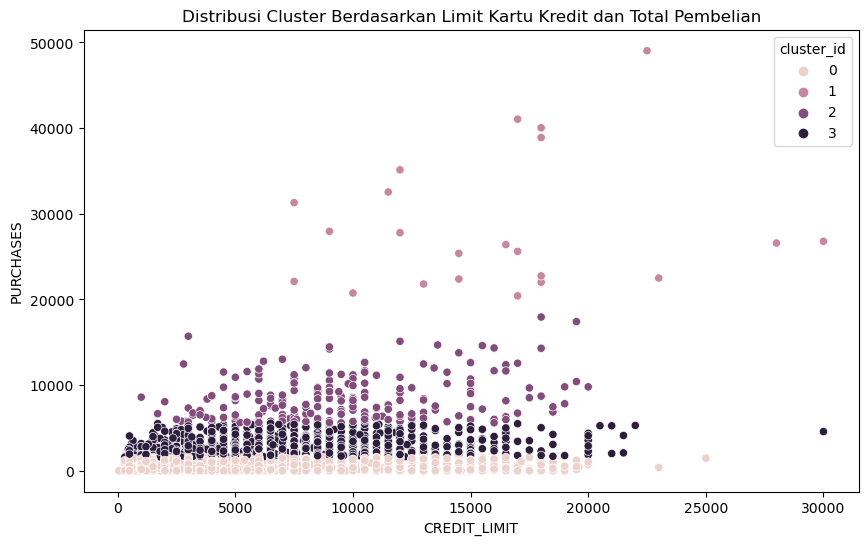

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Limit Kartu Kredit dan Total Pembelian')
plt.show()

In [24]:
#jika n = 3
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=23)

In [25]:
df['cluster_id'] = kmeans.labels_

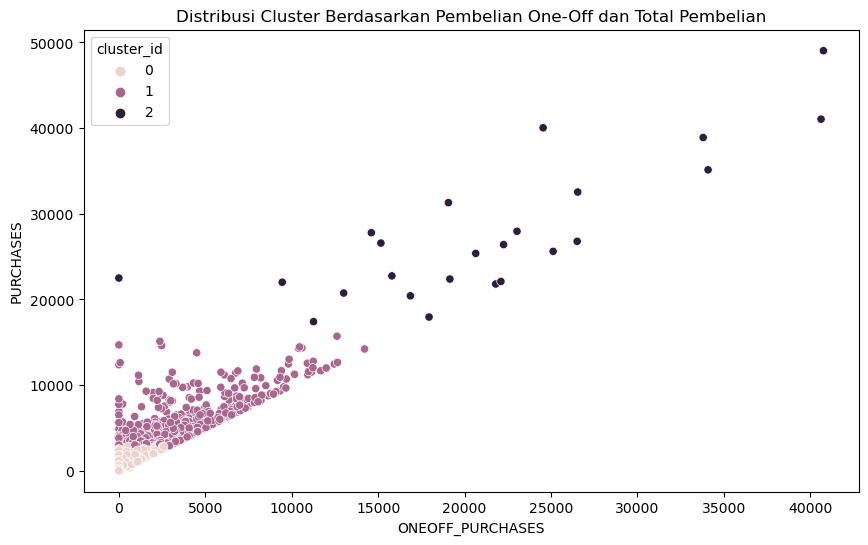

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Pembelian One-Off dan Total Pembelian')
plt.show()

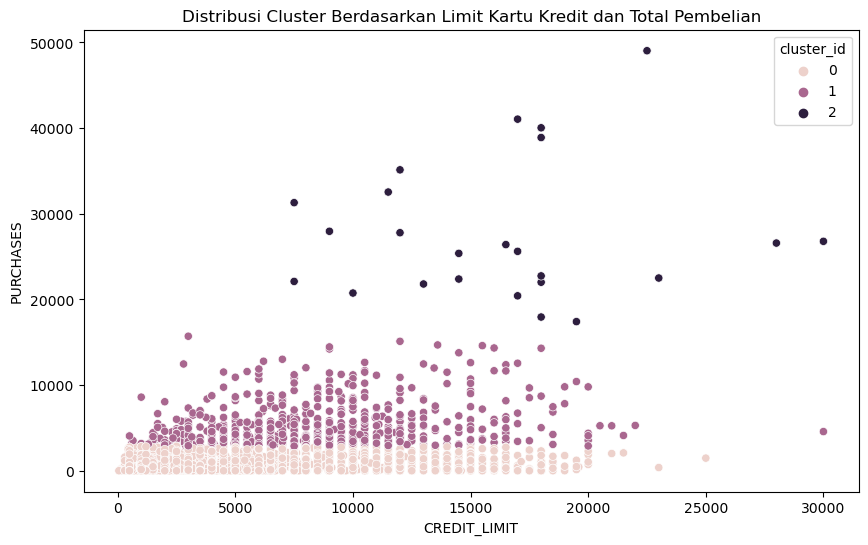

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Limit Kartu Kredit dan Total Pembelian')
plt.show()

In [28]:
#jika n = 4
kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

df['cluster_id'] = kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


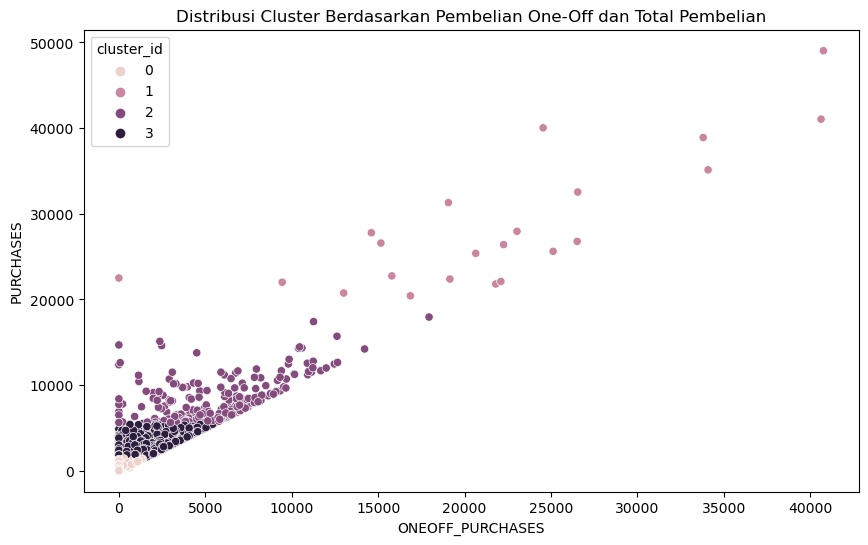

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Pembelian One-Off dan Total Pembelian')
plt.show()

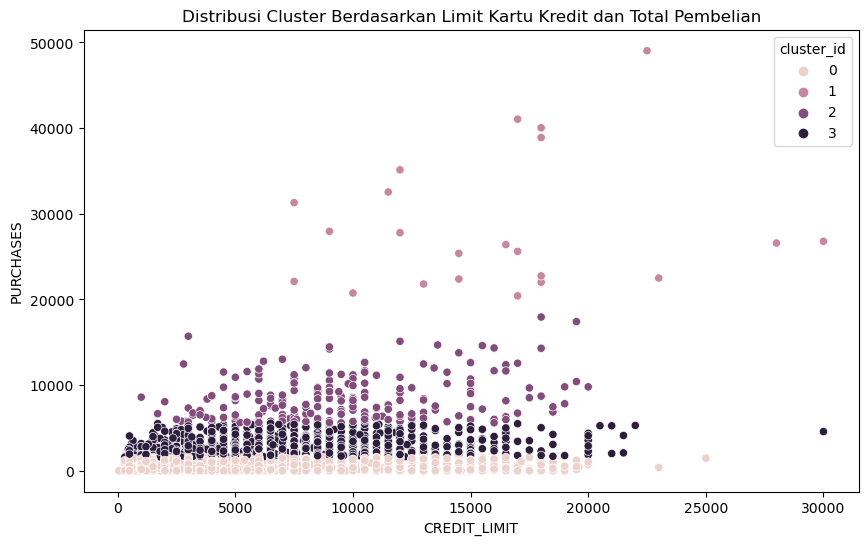

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribusi Cluster Berdasarkan Limit Kartu Kredit dan Total Pembelian')
plt.show()

# Kesimpulan
Telah dilakukan clustering atau pengelompokan untuk dataset Credit Card. Diawali dengan pra-pemrosesan data, yaitu penghapusan kolom CUST_ID karena berisi kode unik, pengisian missing values pada kolom MINIMU_PAYMENTS dan CREDIT_LIMIT, transformasi data dengan log transformation untuk mengatasi skewness di data. Lalu, dibuat heatmap untuk mencari korelasi antar tiap kolom data. Selanjutnya, memanfaatkan Principal Component Analysis (PCA) untuk feature selection. Untuk menentukan nilai clustering n yang optimal adalah dengan menggunakan metode Elbow dan Silhouette Score. Didapatkan nilai Silhouette Score tertinggi ketika n = 2, yaitu 0.8700455999561807. Dengan demikian, dataset berhasil dilakukan clustering dengan n = 2, artinya terbagi menjadi 2 kelompok, pengguna kartu kredit dengan pembelian rendah dan pengguna kartu kredit dengan pembelian tinggi.